# PP5 - Mildew Detection in Cherry Leaves

## Notebook 2 - Data Visualization

### Objectives

* Fetch data from kaggle and prepare data for further processes.


### Inputs

* Dataset: [Kaggle](https://www.kaggle.com/datasets/codeinstitute/cherry-leaves/data)

| **input**       |          |        |
|-----------------|----------|--------|
| **train/**      | healthy  | mildew |
| **test/**       | healthy  | mildew |
| **validation/** | healthy  | mildew |


### Outputs
- Data/Image visualization
- outputs/{version}


---

## Preparation

### Manage Directories

**Change working directory**

In [1]:
import os

In [2]:
current_dir = os.getcwd()
current_dir

'/workspace/ml-mildew-detection-in-cherry-leaves/jupyter_notebooks'

In [6]:
os.chdir('/workspace/ml-mildew-detection-in-cherry-leaves')
print("You set a new current directory")

You set a new current directory


In [8]:
working_dir = os.getcwd()
working_dir

'/workspace/ml-mildew-detection-in-cherry-leaves'

**Set Input Directory**

In [9]:
dataset_dir= 'input/cherry-leaves'
train_path = dataset_dir + '/train'
val_path = dataset_dir + '/validation'
test_path = dataset_dir + '/test'
print(f"Train Set Path: {train_path}")
print(f"Validation Set Path: {val_path}")
print(f"Test Set Path: {test_path}")

Train Set Path: input/cherry-leaves/train
Validation Set Path: input/cherry-leaves/validation
Test Set Path: input/cherry-leaves/test


**Set Output Directory**

In [10]:
version = 'v1'

In [11]:
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

print(file_path)

outputs/v1


**Set Label Names**

In [12]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'mildew']


---

## Data visualisation of Image Data

**Import Libraries**

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

**Get current Image Shape**

In [14]:
img_height, img_width = [], []

for label in labels:
    for image_filename in os.listdir(os.path.join(train_path, label)):
        img = imread(os.path.join(train_path, label, image_filename))
        d1, d2, colors = img.shape
        img_height.append(d1)
        img_width.append(d2)


In [15]:
img_height_mean = int(np.array(img_height).mean())
img_width_mean = int(np.array(img_width).mean())

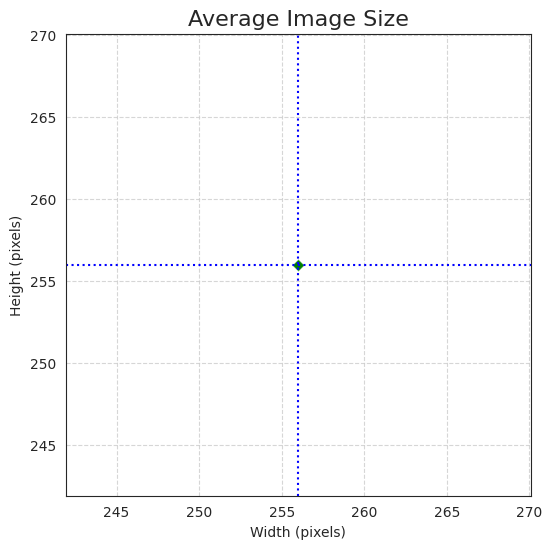

Image Width average: 256 
Image Height average: 256


In [16]:
sns.set_style("white")
fig, axes = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=img_width, y=img_height, alpha=0.3, color='green', marker='D')
axes.set_xlabel("Width (pixels)", fontsize=10)
axes.set_ylabel("Height (pixels)", fontsize=10)
axes.axvline(x=img_height_mean, color='blue', linestyle=':')
axes.axhline(y=img_width_mean, color='blue', linestyle=':')
plt.title("Average Image Size", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

print(f"Image Width average: {img_width_mean} \nImage Height average: {img_height_mean}")

In [17]:
num_color_channels = 3
image_shape = (img_height_mean, img_width_mean, num_color_channels)
image_shape

(256, 256, 3)

**Save image shape for further usage**

In [18]:
joblib.dump(value=image_shape, filename=f"{file_path}/avg_image_shape_train.pkl")

['outputs/v1/avg_image_shape_train.pkl']

---

## Average and Variability of Images per Label

**Load images in an array**

In [19]:
from tensorflow.keras.preprocessing import image

2024-04-23 16:28:26.704978: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
import os
import numpy as np
from keras.preprocessing import image

def load_image_as_array(dataset_dir, new_size=(100, 100), n_images_per_label=20):
    '''
    Description:
    Loads images from a directory in an array

    Parameters:
    dataset_dir - str:         Directory path of images
    new_size - tuple:          New size to which images will be resized
    n_images_per_label - int:  Number of images to be loaded per label

    Returns:
    X as numpy array: Array containing the images
    y as numpy array: Array containing the labels of the images
    '''
    X, y = np.array([], dtype='int'), np.array([], dtype='object')
    labels = os.listdir(dataset_dir)

    for label in labels:
        counter = 0
        for image_filename in os.listdir(os.path.join(dataset_dir, label)):
            if counter < n_images_per_label:
                img = image.load_img(
                    os.path.join(dataset_dir, label, image_filename),
                    target_size=new_size
                )
                resize_img = image.img_to_array(img) / 255.0

                X = np.append(
                    X, resize_img
                ).reshape(-1, new_size[0], new_size[1], resize_img.shape[2])
                
                y = np.append(y, label)
                counter += 1

    return X, y


In [24]:
X, y = load_image_as_array(dataset_dir=train_path,
                           new_size=image_shape,
                           n_images_per_label=30)
print("Final shape of X:", X.shape)
print("Final shale of y:", y.shape)

Final shape of X: (60, 256, 256, 3)
Final shale of y: (60,)


**Plot and save mean vaiability of images per label**

In [27]:
def plot_avg_variability_per_labels(X, y, figsize=(10, 5), save_image=False):
    '''
    Description:
    Plots average and variability of images for no-tumor and tumor (labels)

    Parameters:
    X - numpy array:    Input images
    y - numpy array:    Labels of images
    figsize - tuple:    Size of the figure
    save_image - bool:  Optional to save the image, default is false

    Returns:
    None

    '''

    for label_to_display in np.unique(y):
        sns.set_style("white")

        y = y.reshape(-1, 1, 1)
        boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
        arr = X[boolean_mask]

        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)
        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")
        
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f'Average image for {label_to_display} label')
        axes[0].imshow(avg_img)
        axes[1].set_title(f'Variability image for {label_to_display} label')
        axes[1].imshow(std_img)

        if save_image:
            plt.savefig(f'{file_path}/avg_var_{label_to_display}.png',
                        bbox_inches='tight', dpi=150)
        else:
            plt.tight_layout()
            plt.show()
            print("\n")

==== Label healthy ====
Image Shape: (256, 256, 3)
==== Label mildew ====
Image Shape: (256, 256, 3)


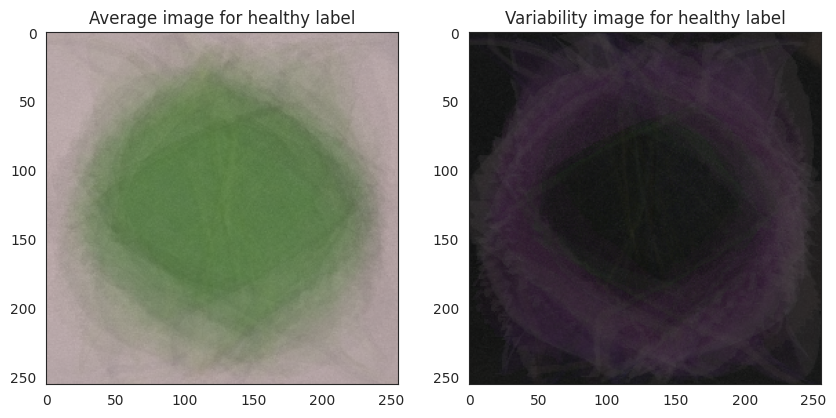

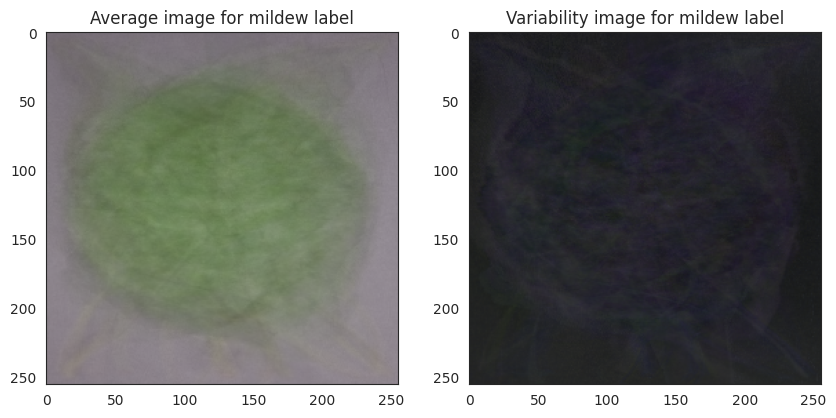

In [28]:
plot_avg_variability_per_labels(X=X, y=y, figsize=(10, 5), save_image=True)

---

## Difference between average healthy leaf and average powdery mildew infected leaf

In [29]:
def subset_image_label(X, y, label_to_display):
    '''
    Description:
    Subsets input images based on the specified label

    Parameters:
    X - numpy array:            Input images
    y - numpy array:            Labels of the images
    label_to_display - int:     Label to subset the data for

    Returns:
    numpy array:                Subset of input images corresponding to the specified label
    '''
    y = y.reshape(-1, 1, 1)
    boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
    df = X[boolean_mask]
    return df

In [30]:
def diff_bet_avg_image_labels_data_as_array(X, y, label_1, label_2,
                                            figsize=(20, 5),
                                            save_image=False):
    '''
    Description:
    Calculates the average and difference between two sets of leaf images based on their labels and plots three images:

    Plot 1: Displays the average leaf image for the specified label_0 (healthy)
    Plot 2: Displays the average leaf image for the specified label_1 (mildew)
    Plot 3: Displays the difference between the average leaf images for label_0 and label_1

    Parameters:
    - X - numpy array:  containing input images of leaves
    - y - numpy array:  containing labels of the input images
    - label_0 - int:    representing the label for the first set of leaf images (healthy)
    - label_1 - int:    representing the label for the second set of leaf images (mildew)
    - figsize - Tuple:  specifying the size of the figure (default is (20, 5))
    - save_image - bool:indicating whether to save the generated image (default is False)

    Returns:
    None

    '''

    sns.set_style("white")

    if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
        print(
            f'Label {label_1} or label {label_2}, are not in '
            f'{np.unique(y)} ')
        return

    images_label = subset_image_label(X, y, label_1)
    label1_avg = np.mean(images_label, axis=0)

    images_label = subset_image_label(X, y, label_2)
    label2_avg = np.mean(images_label, axis=0)

    difference_mean = label1_avg - label2_avg
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)

    axes[0].imshow(label1_avg, cmap='gray')
    axes[0].set_title(f'Average {label_1} leaf')
    axes[1].imshow(label2_avg, cmap='gray')
    axes[1].set_title(f'Average {label_2} leaf')
    axes[2].imshow(difference_mean, cmap='gray')
    axes[2].set_title(f'Difference: Avg {label_1} & {label_2} leaf')

    if save_image:
        plt.savefig(f"{file_path}/avg_diff.png", bbox_inches='tight', dpi=150)
    else:
        plt.tight_layout()
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


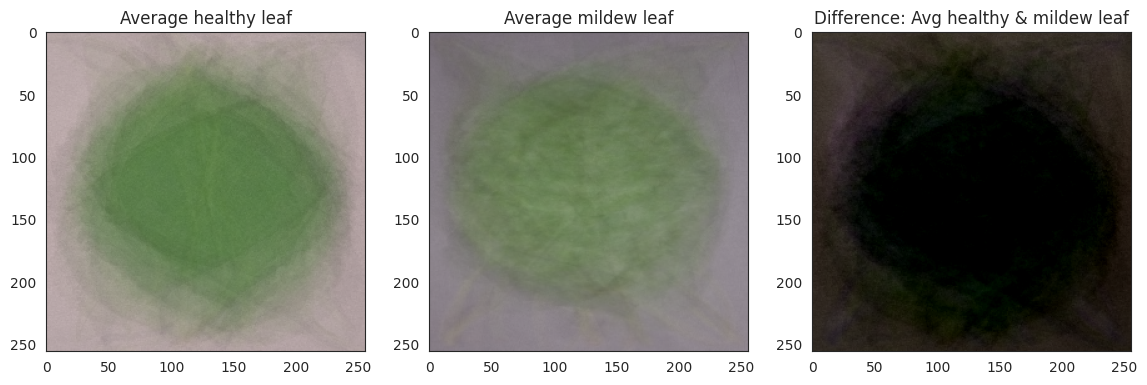

In [31]:
diff_bet_avg_image_labels_data_as_array(X=X, y=y,
                                        label_1='healthy',
                                        label_2='mildew',
                                        figsize=(14, 14),
                                        save_image=True
                                        )

---

## Image Montage

**Import Packages**

In [32]:
import itertools
import random

In [35]:
def image_montage(dir_path, label_to_display, nrows, ncols, figsize=(15, 10)):
    """
    Description:
    Displays a montage of images for a given label

    Parameters:
    dir_path - str:             Path to the directory containing the images
    label_to_display - str:     Label of the images to display
    nrows - int:                Number of rows in the montage grid
    ncols - int:                Number of columns in the montage grid
    figsize - tuple:            Size of the figure (default is (15, 10))

    Returns:
    None

    Raises:
    FileNotFoundError:          If the specified label doesn't exist in the directory
    """

    labels = os.listdir(dir_path)

    if label_to_display in labels:

        images_list = os.listdir(os.path.join(dir_path, label_to_display))
        if nrows * ncols < len(images_list):
            img_idx = random.sample(images_list, nrows * ncols)
        else:
            return

        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
        for i, ax in enumerate(axes.flat):
            img = imread(os.path.join(dir_path, label_to_display, img_idx[i]))
            ax.imshow(img)
            ax.set_xticks([])
            ax.set_yticks([])

        img_shape = imread(os.path.join(dir_path, label_to_display, img_idx[0])).shape
        if label_to_display == 'healthy':
            label_info = "Image Montage healthy leaves"
        elif label_to_display == 'mildew':
            label_info = "Image Montage powdery mildew infected leaves"
        else:
            label_info = f"Image Montage {label_to_display} leaves"
        
        width_height_info = f"Image Width: {img_shape[1]}px and Height: {img_shape[0]}px"
        plt.suptitle(f"{label_info}\n{width_height_info}", fontsize=16)

        plt.tight_layout()
        plt.show()

    else:
        print("The selected label does not exist.")
        print(f"The existing options are: {labels}")

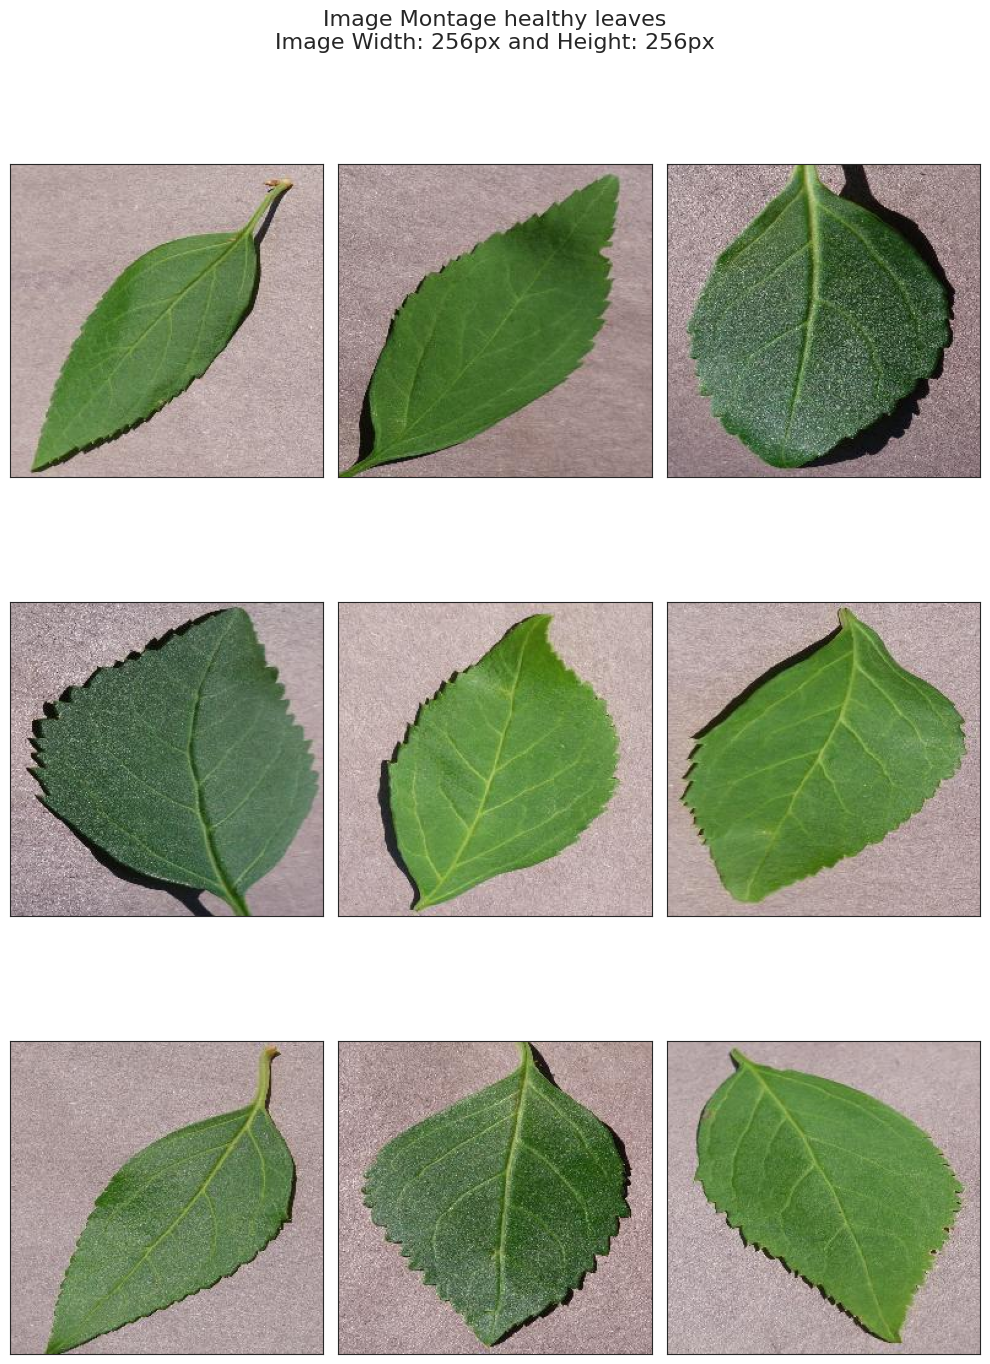

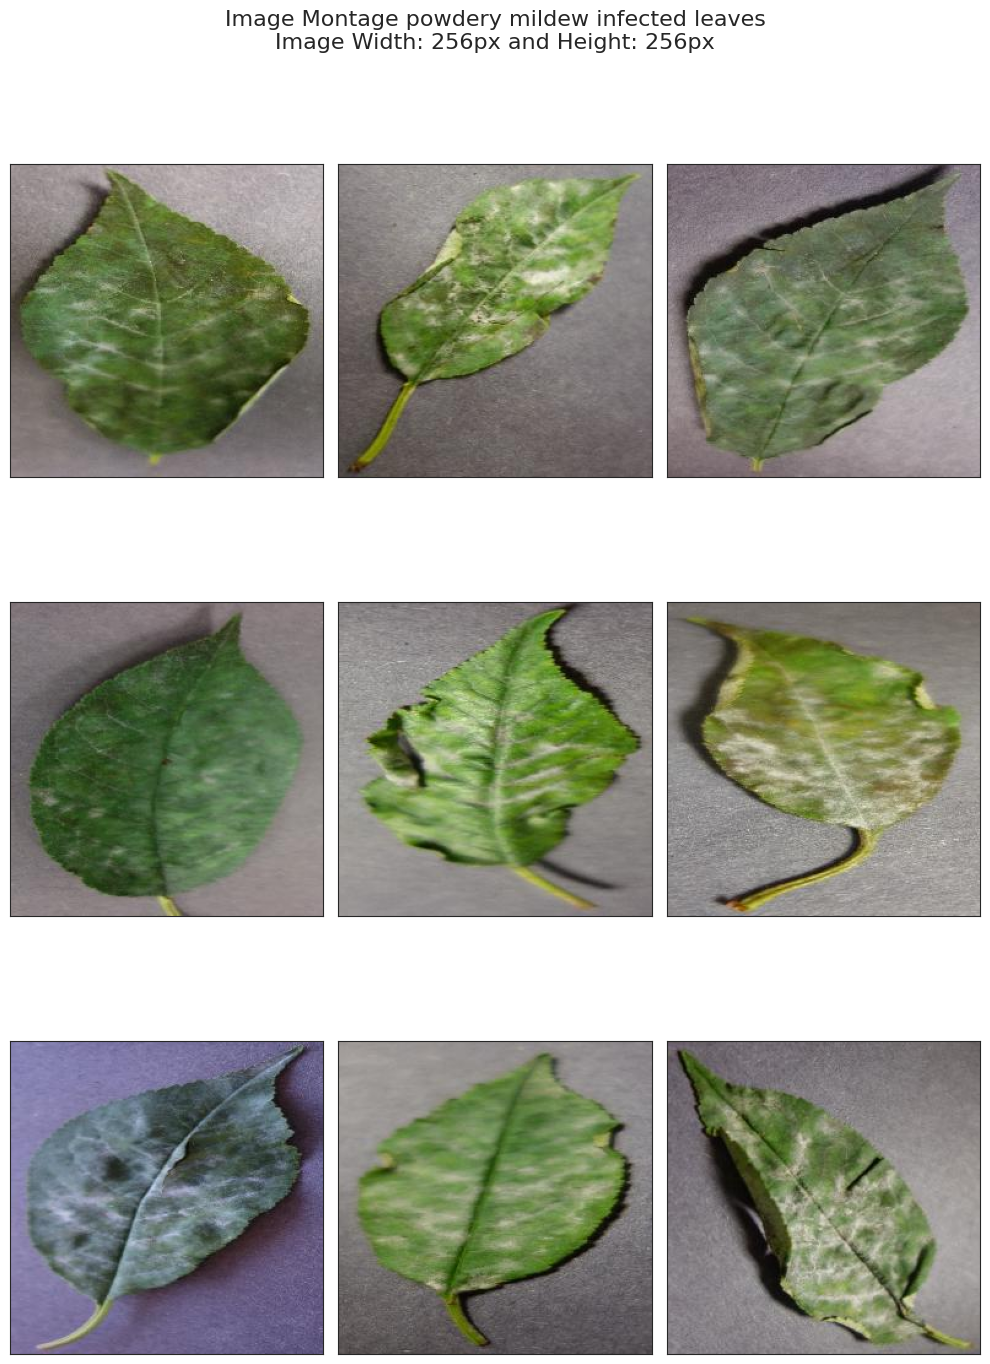

In [36]:
for label in labels:
    image_montage(dir_path=train_path,
                  label_to_display=label,
                  nrows=3, ncols=3,
                  figsize=(10, 15))
    print("\n")